# Final Project Modelling (Clustering) - Stage 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans, AgglomerativeClustering, BisectingKMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

## Load Final Datasets

In [3]:
df_model = pd.read_csv('https://raw.githubusercontent.com/valencya07/Final-Project/refs/heads/stage-2/dataset_final.csv')
df_model.sample(5)

,job_title,source,avg_time_to_hire,avg_cost_per_hire,avg_OAR,hiring_count,avg_time_to_hire_scaled,avg_cost_per_hire_scaled,avg_OAR_scaled,efficiency_score
45,Marketing Specialist,LinkedIn,50.396226,5033.550943,0.637736,53,0.619748,-0.421812,-0.378913,59.509106
26,DevOps Engineer,Recruiter,52.615385,6720.755385,0.616923,39,1.065962,3.104490,-0.901551,0.000000
67,SEO Analyst,Referral,53.785714,5274.293571,0.680714,56,1.301285,0.081346,0.700337,58.113161
73,Sales Representative,LinkedIn,49.641509,4641.177925,0.625660,53,0.467994,-1.241882,-0.682145,68.360254
0,Account Executive,Job Portal,44.672131,4777.670656,0.645574,61,-0.531218,-0.956609,-0.182092,84.431684


## Feature Selection

In [4]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   job_title                 96 non-null     object 
 1   source                    96 non-null     object 
 2   avg_time_to_hire          96 non-null     float64
 3   avg_cost_per_hire         96 non-null     float64
 4   avg_OAR                   96 non-null     float64
 5   hiring_count              96 non-null     int64  
 6   avg_time_to_hire_scaled   96 non-null     float64
 7   avg_cost_per_hire_scaled  96 non-null     float64
 8   avg_OAR_scaled            96 non-null     float64
 9   efficiency_score          96 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 7.6+ KB


In [5]:
# Hanya menggunakan avg_time_to_hire_scaled, avg_cost_per_hire_scaled, avg_OAR_scaled untuk clustering karena
#ketiga itu merupakan feature KPI dari kasus ini
X_clustering = df_model[[
    'avg_time_to_hire_scaled',
    'avg_cost_per_hire_scaled',
    'avg_OAR_scaled'
]]

print("Data siap! Fitur yang digunakan untuk clustering adalah:")
print(X_clustering.columns.tolist())
print(f"\nJumlah baris: {len(X_clustering)}")
X_clustering.head()

Data siap! Fitur yang digunakan untuk clustering adalah:
['avg_time_to_hire_scaled', 'avg_cost_per_hire_scaled', 'avg_OAR_scaled']

Jumlah baris: 96


,avg_time_to_hire_scaled,avg_cost_per_hire_scaled,avg_OAR_scaled
0,-0.531218,-0.956609,-0.182092
1,-0.600630,-1.610114,-0.495905
2,0.534786,-0.450687,1.184628
3,-0.209021,-0.147871,-1.090171
4,-0.863418,-0.028454,0.657289


## Modeling

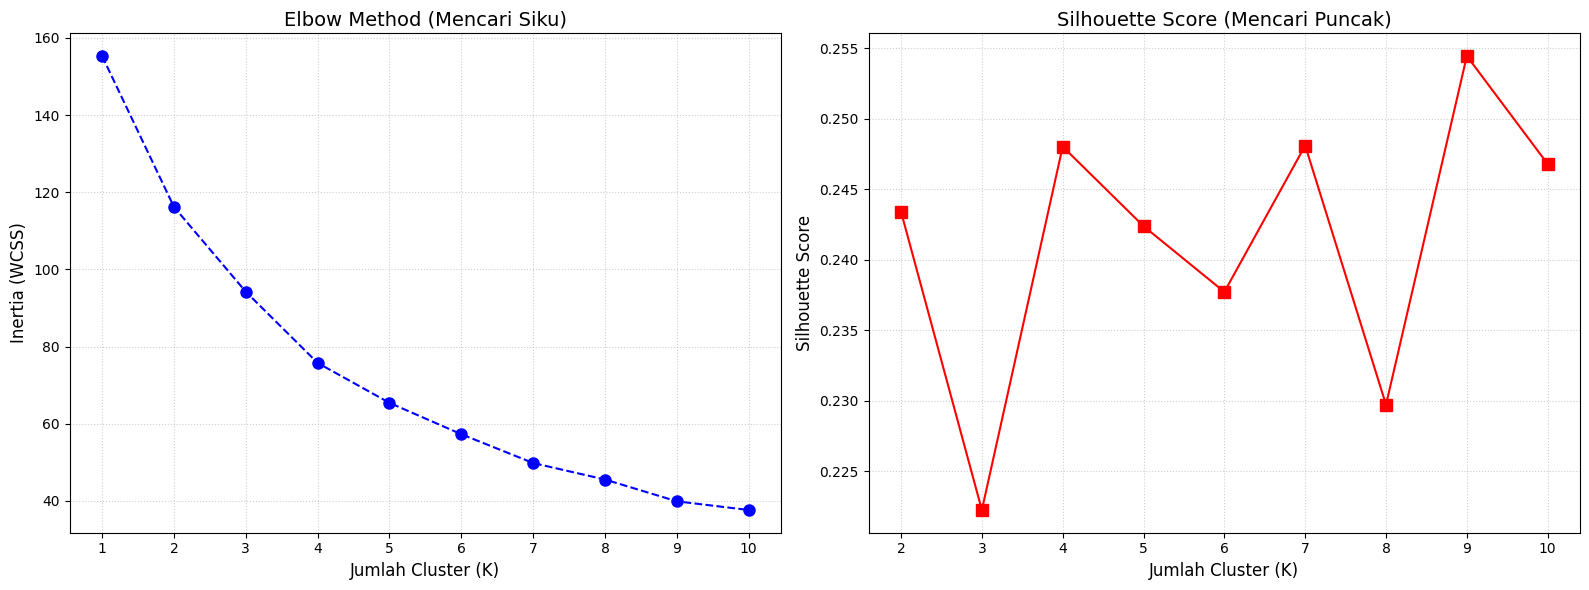

--- Ringkasan Metrik Evaluasi Clustering ---
 K    Inertia  Silhouette Score
 2 116.193215          0.243407
 3  94.214381          0.222264
 4  75.765691          0.248026
 5  65.421716          0.242388
 6  57.291204          0.237725
 7  49.824862          0.248101
 8  45.549935          0.229728
 9  39.906605          0.254448
10  37.650894          0.246796


In [6]:
# Inisialisasi list untuk menyimpan metrik evaluasi
inertia = []
silhouette_avgs = []
K_range = range(1, 11) # Mencoba dari 1 sampai 10 cluster

# Perulangan untuk menghitung metrik setiap K
for k in K_range:
    # Inisialisasi model KMeans
    # n_init=10 untuk memastikan stabilitas hasil (menghindari inisialisasi buruk)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_clustering)

    # Simpan Inertia (untuk Elbow Method)
    inertia.append(kmeans.inertia_)

    # Simpan Silhouette Score (untuk K >= 2 saja)
    if k > 1:
        score = silhouette_score(X_clustering, kmeans.labels_)
        silhouette_avgs.append(score)

# isualisasi Hasil
plt.figure(figsize=(16, 6))

# Plot Kiri: Elbow Method
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o', linestyle='--', color='blue', markersize=8)
plt.title('Elbow Method (Mencari Siku)', fontsize=14)
plt.xlabel('Jumlah Cluster (K)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.xticks(K_range)
plt.grid(True, linestyle=':', alpha=0.6)

# Plot Kanan: Silhouette Analysis
plt.subplot(1, 2, 2)
# Silhouette score mulai dari K=2
plt.plot(range(2, 11), silhouette_avgs, marker='s', linestyle='-', color='red', markersize=8)
plt.title('Silhouette Score (Mencari Puncak)', fontsize=14)
plt.xlabel('Jumlah Cluster (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(range(2, 11))
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

# Menampilkan Ringkasan Data dalam Tabel
results_summary = pd.DataFrame({
    'K': range(2, 11),
    'Inertia': inertia[1:],
    'Silhouette Score': silhouette_avgs
})

print("--- Ringkasan Metrik Evaluasi Clustering ---")
print(results_summary.to_string(index=False))

In [7]:
# Eksperimen K=3
kmeans3 = KMeans(n_clusters=3, random_state=42, n_init=10)
df_model['cluster_k3'] = kmeans3.fit_predict(X_clustering)

# Eksperimen K=4
kmeans4 = KMeans(n_clusters=4, random_state=42, n_init=10)
df_model['cluster_k4'] = kmeans4.fit_predict(X_clustering)

# Fungsi untuk melihat karakteristik asli (bukan yang scale)
def get_profile(df, cluster_col):
    return df.groupby(cluster_col)[[
        'avg_time_to_hire', 'avg_cost_per_hire', 'avg_OAR', 'hiring_count'
    ]].mean().sort_values('avg_OAR', ascending=False)

print("--- PROFIL JIKA MENGGUNAKAN K=3 ---")
print(get_profile(df_model, 'cluster_k3'))

print("\n--- PROFIL JIKA MENGGUNAKAN K=4 ---")
print(get_profile(df_model, 'cluster_k4'))

--- PROFIL JIKA MENGGUNAKAN K=3 ---
            avg_time_to_hire  avg_cost_per_hire   avg_OAR  hiring_count
cluster_k3                                                             
0                  48.174989        5205.969106  0.684098     50.571429
2                  47.769358        5632.546828  0.640591     51.730769
1                  46.269806        4966.990786  0.635967     53.309524

--- PROFIL JIKA MENGGUNAKAN K=4 ---
            avg_time_to_hire  avg_cost_per_hire   avg_OAR  hiring_count
cluster_k4                                                             
1                  49.440756        5212.538383  0.679943     50.413793
2                  45.726595        5712.254991  0.649007     51.684211
3                  44.317382        4958.688772  0.646124     53.000000
0                  49.538048        5114.361098  0.618989     53.600000


### Perbandingan 5 model clustering

In [8]:
# Tetapkan K = 3 berdasarkan keputusan bisnis
k_final = 3

# Siapkan list untuk menyimpan skor
model_comparison = []

# 1. K-Means
km = KMeans(n_clusters=k_final, random_state=42, n_init=10)
km_labels = km.fit_predict(X_clustering)
model_comparison.append(['K-Means', silhouette_score(X_clustering, km_labels)])

# 2. Agglomerative (Hierarchical)
agg = AgglomerativeClustering(n_clusters=k_final)
agg_labels = agg.fit_predict(X_clustering)
model_comparison.append(['Agglomerative', silhouette_score(X_clustering, agg_labels)])

# 3. Gaussian Mixture (GMM)
gmm = GaussianMixture(n_components=k_final, random_state=42)
gmm_labels = gmm.fit_predict(X_clustering)
model_comparison.append(['GMM', silhouette_score(X_clustering, gmm_labels)])

# 4. Bisecting K-Means
bisect = BisectingKMeans(n_clusters=k_final, random_state=42)
bisect_labels = bisect.fit_predict(X_clustering)
model_comparison.append(['Bisecting K-Means', silhouette_score(X_clustering, bisect_labels)])

# 5. Spectral Clustering
spectral = SpectralClustering(n_clusters=k_final, random_state=42, affinity='nearest_neighbors')
spectral_labels = spectral.fit_predict(X_clustering)
model_comparison.append(['Spectral Clustering', silhouette_score(X_clustering, spectral_labels)])

# Tampilkan Perbandingan
df_compare = pd.DataFrame(model_comparison, columns=['Model', 'Silhouette Score'])
print("--- PERBANDINGAN 5 MODEL CLUSTERING (K=3) ---")
print(df_compare.sort_values(by='Silhouette Score', ascending=False))

--- PERBANDINGAN 5 MODEL CLUSTERING (K=3) ---
                 Model  Silhouette Score
4  Spectral Clustering          0.226815
0              K-Means          0.222264
3    Bisecting K-Means          0.199686
2                  GMM          0.197585
1        Agglomerative          0.182026


### Visualisasi Cluster (PCA)

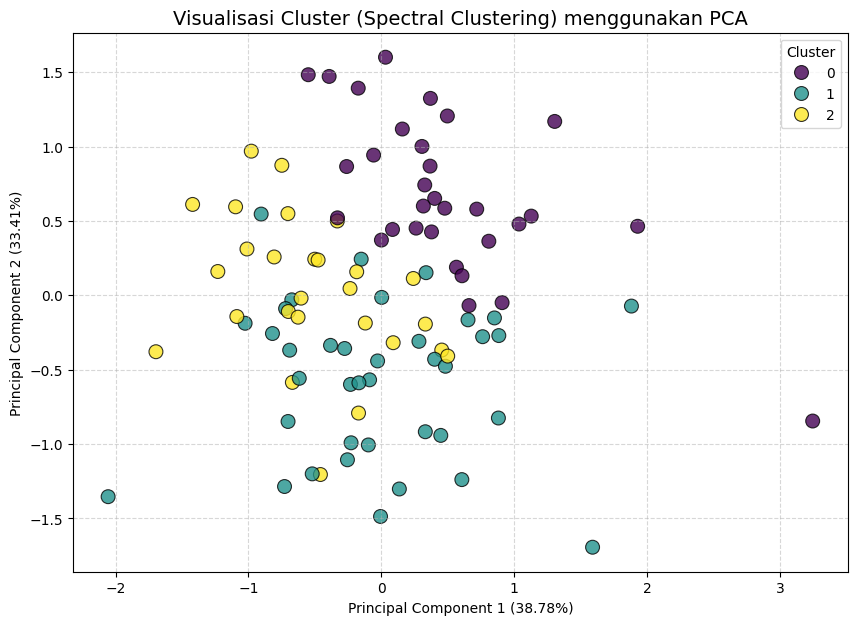

Total informasi (varians) yang berhasil dipertahankan dalam 2D: 72.19%


In [9]:
# Reduksi Dimensi dengan PCA untuk Visualisasi 2D
df_model['cluster'] = spectral_labels

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_clustering)

# Masukkan hasil PCA ke dataframe
df_model['pca_1'] = pca_result[:, 0]
df_model['pca_2'] = pca_result[:, 1]

# 5. Visualisasi Cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='pca_1', y='pca_2',
    hue='cluster',
    palette='viridis',
    data=df_model,
    s=100,
    alpha=0.8,
    edgecolor='k'
)

# Menghitung total varians yang tertangkap oleh PCA
total_variance = np.sum(pca.explained_variance_ratio_) * 100

plt.title('Visualisasi Cluster (Spectral Clustering) menggunakan PCA', fontsize=14)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print(f"Total informasi (varians) yang berhasil dipertahankan dalam 2D: {total_variance:.2f}%")

### EValuasi

In [10]:
# Menghitung Technical Success Metrics
db_index = davies_bouldin_score(X_clustering, spectral_labels)
ch_index = calinski_harabasz_score(X_clustering, spectral_labels)
sil_score = silhouette_score(X_clustering, spectral_labels)

# Menampilkan Hasil
print("--- HASIL EVALUASI TEKNIS SPECTRAL CLUSTERING (K=3) ---")
print(f"1. Silhouette Score (Tinggi = Bagus)      : {sil_score:.4f}")
print(f"2. Davies-Bouldin Index (Rendah = Bagus)  : {db_index:.4f}")
print(f"3. Calinski-Harabasz Index (Tinggi = Bagus): {ch_index:.4f}")

--- HASIL EVALUASI TEKNIS SPECTRAL CLUSTERING (K=3) ---
1. Silhouette Score (Tinggi = Bagus)      : 0.2268
2. Davies-Bouldin Index (Rendah = Bagus)  : 1.3183
3. Calinski-Harabasz Index (Tinggi = Bagus): 28.2816


### Interpretasi Cluster


In [11]:
# 1. Menghitung Rata-rata Karakteristik Asli per Cluster
# Kita gunakan kolom original (bukan _scaled) agar mudah dipahami
cluster_profile = df_model.groupby('cluster').agg(
    avg_OAR=('avg_OAR', 'mean'),
    avg_cost=('avg_cost_per_hire', 'mean'),
    avg_time=('avg_time_to_hire', 'mean'),
    hiring_volume=('hiring_count', 'sum'),
    total_combinations=('job_title', 'count')
).sort_values(by='avg_OAR', ascending=False)

print("--- PROFILING CLUSTER (RECRUITMENT STRATEGY) ---")
print(cluster_profile)

# 2. Melihat Contoh Kombinasi di Setiap Cluster
print("\n--- CONTOH KOMBINASI PER CLUSTER ---")
for c in cluster_profile.index:
    print(f"\nCluster {c}:")
    display(df_model[df_model['cluster'] == c][['job_title', 'source', 'efficiency_score']].head(3))

--- PROFILING CLUSTER (RECRUITMENT STRATEGY) ---
          avg_OAR     avg_cost   avg_time  hiring_volume  total_combinations
cluster                                                                     
0        0.676035  5382.533250  49.404500           1577                  31
2        0.639729  4916.802691  49.204560           1406                  27
1        0.639235  5295.125318  44.057164           2017                  38

--- CONTOH KOMBINASI PER CLUSTER ---

Cluster 0:


,job_title,source,efficiency_score
2,Account Executive,Recruiter,81.715083
6,Accountant,Recruiter,65.309502
8,Backend Developer,Job Portal,79.005493



Cluster 2:


,job_title,source,efficiency_score
1,Account Executive,LinkedIn,89.847611
7,Accountant,Referral,37.963254
10,Backend Developer,Recruiter,58.935845



Cluster 1:


,job_title,source,efficiency_score
0,Account Executive,Job Portal,84.431684
3,Account Executive,Referral,57.438206
4,Accountant,Job Portal,87.654280
